#2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

## Θεωρητικό Μέρος

Μελετάμε άρθρα σχετικά με διάσημες CNN αρχιτεκτονικές (LeNet, AlexNet, VGG) και τις αντοίστιχες υλοποιήσεις τους και δημιουργούμε ένα συγκριτικό πίνακα μεταξύ τους καθώς και τους σχολιάζουμε προς την αποδοτικοτητά τους.

### Συγκριτικός Πίνακας Δικτύων

| Δίκτυο    | Επίπεδα          | Μέγεθος Φίλτρων | Συνάρτηση Ενεργοποίησης | Παράμετροι | Pooling       | Dropout      |
|-----------|------------------|------------------|----------------------------|-------------|----------------|----------------|
| Lenet | 7              |5x5              | sigmoid                        | 60000         | Average            | no            |
| AlexNet | 11              | 11x11, 5x5, 3x3              | RELU                        | 60000000         | Max            | yes  (0.5)          |
| VGG-16 | 16-19              | 3x3              | RELU                       | 138000000         | Max            | yes  (0.5)         |

---



**Lenet** Layers: Conv ==> AvgPool ==> Conv ==> AvgPool ==> FC ==> FC ==> softmax

**AlexNet** Layers: Conv => Max-pool => Conv => Max-pool => Conv => Conv => Conv => Max-pool ==> Flatten ==> FC ==> FC ==> Softmax

**VGG** Layers: consists of blocks (sequential CNN's 3x3 and max pool) and is very deep.



### Σχολιασμός Απόδοσης

- **Lenet**: Εξαιρετικά αποτελεσματικό για την αναγνώριση χειρόγραφων ψηφίων (π.χ., MNIST), όπου πέτυχε πολύ χαμηλά ποσοστά σφάλματος. Ωστόσο, η μικρή του χωρητικότητα (λίγα επίπεδα, λίγες παράμετροι) και η χρήση παλαιότερων συναρτήσεων ενεργοποίησης το καθιστούν ανεπαρκές για πολύπλοκα προβλήματα αναγνώρισης εικόνων μεγάλης κλίμακας όπως το ImageNet


- **AlexNet**: Πέτυχε πρωτοφανή αποτελέσματα στο διαγωνισμό ImageNet LSVRC-2012, μειώνοντας το ποσοστό σφάλματος κατά πολύ σε σχέση με τις προηγούμενες μεθόδους. Εισήγαγε ή/και καθιέρωσε τη χρήση ReLU για ταχύτερη σύγκλιση, το Dropout για την αντιμετώπιση της υπερπροσαρμογής (overfitting) σε μεγάλα δίκτυα, την εκτεταμένη αύξηση δεδομένων (data augmentation) και την τεχνική του overlapping pooling. Είναι πιο βαθύ απο Lenet και αρα απαιτεί περισσότερους υπολογιστικούς πόρους.


- **VGG**: Πέτυχε ακόμα καλύτερα αποτελέσματα από το AlexNet στο ImageNet (LSVRC 2014), αποδεικνύοντας ότι το αυξημένο βάθος (16-19 επίπεδα) είναι κρίσιμο για την απόδοση. Η απλή και ομοιόμορφη δομή του το έκανε δημοφιλές ως βάση για άλλες εργασίες (π.χ., transfer learning). Ωστόσο, έχει πολύ μεγάλο αριθμό παραμέτρων (κυρίως στα FC επίπεδα) και είναι υπολογιστικά απαιτητικό τόσο στην εκπαίδευση όσο και στη χρήση μνήμης.



Ένα βασικό χαρακτηριστικό των τριών παραπάνω δικτύων που συνέβαλε στη σταδιακή αύξηση της ακρίβειας ταξινόμησης είναι η χρήση συναρτήσεων ενεργοποίησης, καθώς μέσω αυτών μοντελοποιείται η μη γραμμικότητα του προβλήματος. Επιπλέον, η πολυεπίπεδη αρχιτεκτονική των δικτύων επιτρέπει την τροφοδότηση τους απευθείας με την εικόνα και τη σταδιακή 'αποσύνθεση' της για feature extraction και στη συνέχεια classification tasks. Τέλος, και οι τρεις αρχιτεκτονικές μπορούν εύκολα να προσαρμοστούν με την εισαγωγή και τροποποίηση επιπέδων καθώς και τεχνικών pooling & dropout που φάνηκαν ιδιαίτερα αποτελεσματικές στην αντιμετώπιση φαινομένων overfitting & vanishing gradient (relu), οδηγώντας εν τέλει σε αυξημένα ποσοστά ευστοχίας.


## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [ ]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας.

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 161 #03121161

In [ ]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
#team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
# the url isnt accesible from colab so i will save manualy and load it from a file
team_classes = pd.read_csv('team_classes.csv', sep=',', header=None)
#CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]
CIFAR100_LABELS_LIST = pd.read_csv('CIFAR100_LABELS_LIST.csv', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

[' bear', ' butterfly', ' caterpillar', ' chair', ' cloud', ' elephant', ' fox', ' leopard', ' man', ' plate', ' sea', ' shark', ' skunk', ' snake', ' streetcar', ' table', ' tank', ' tiger', ' tulip', ' willow_tree']


In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


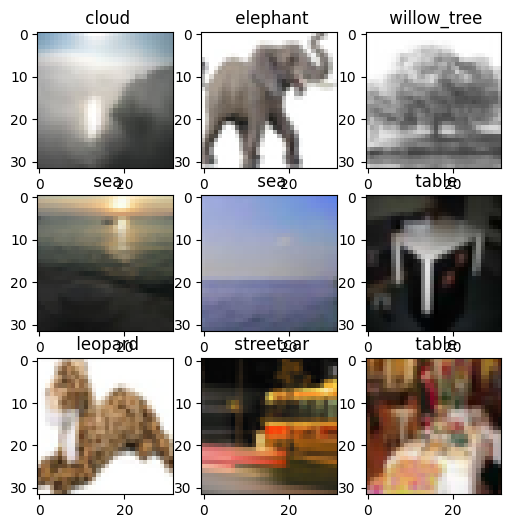

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [ ]:
#Because the loss function expects classes from 0 to 19

# Define the original labels
original_labels = [3, 14, 18, 20, 23, 31, 34, 42, 46, 61, 71, 73, 75, 78, 81, 84, 85, 88, 92, 96]

# Create a mapping dictionary
label_mapping = {label: index for index, label in enumerate(original_labels)}

# Function to apply the mapping
def map_labels(labels):
  mapped_labels = np.vectorize(label_mapping.get)(labels)
  return mapped_labels

y_train = map_labels(y_train)
y_test = map_labels(y_test)
y_val = map_labels(y_val)

In [ ]:
print("Sample y_train:", y_train[:10])
print("Sample y_val:", y_val[:10])
print("Number of unique classes in y_train:", len(np.unique(y_train)))
print("Number of unique classes in y_val:", len(np.unique(y_val)))

Sample y_train: [[ 4]
 [ 5]
 [19]
 [10]
 [10]
 [15]
 [ 7]
 [14]
 [15]
 [13]]
Sample y_val: [[16]
 [ 4]
 [ 4]
 [ 3]
 [16]
 [10]
 [15]
 [17]
 [12]
 [ 2]]
Number of unique classes in y_train: 20
Number of unique classes in y_val: 20


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=20)
y_val = to_categorical(y_val, num_classes=20)
y_test = to_categorical(y_test, num_classes=20)

In [ ]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Ερώτημα 1
---
### Βήμα 1: Σχεδίαση και εκπαίδευση των μοντέλων

 Σχεδίαστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας τον ίδιο αλγορίθμο βελτιστοποίησης ([optimizer](https://keras.io/api/optimizers/)), την ίδια συνάρτηση κόστους [loss function](https://keras.io/api/losses/), το ίδιο μέγεθος παρτίδας (batch size) και 50 εποχές (epochs) `*`.

 Για την εκτίμηση της απόδοσης των μοντέλων να χρησιμοποιήσετε ως μετρική ([metrics](https://keras.io/api/metrics/)) την F1-score.


`*`
 Μπορείτε να πειραματιστείτε με τον optimizer, την loss function και το batch size για τα 4 μοντέλα πριν καταλήξετε στην τελική σας κοινή, για όλα τα μοντέλα επιλογή.


---
  
### Βήμα 2: Αξιολόγηση των μοντέλων

α. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε στο Βήμα 1, απεικονίστε σε κοινό διάγραμμα τα F1-scores εκπαίδευσης και επικύρωσης στο σύνολο των εποχών.

β. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων.
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
---

### Βήμα 3: Αξιολόγηση F1-score
Αξιολογήστε τα F1-scores, χρησιμοποιώντας το σύνολο ελέγχου σας (test set).

---

---

#### Βήμα 1: Σχεδίαση και Εκπαιδευση των Μοντέλων

---

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, optimizers, losses, metrics
from tensorflow.keras.utils import to_categorical
import numpy as np

BATCH_SIZE = 128
EPOCHS = 50
F1Score = metrics.F1Score(average= 'weighted')
OPTIMIZER = optimizers.Adam(learning_rate=0.001)
#LOSS_FUNCTION = losses.SparseCategoricalCrossentropy() #unlike categoricalcrossentropy, it doesnt need one hot encoding and preprocessing
LOSS_FUNCTION = losses.CategoricalCrossentropy()

Υλοποίηση **Lenet**

> RELU αντί για sigmoid για καλύτερα αποτελέσματα

In [ ]:
def create_lenet():
    model = models.Sequential([
        layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(16, (5, 5), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(20, activation='softmax')
    ])

    model.compile(optimizer=OPTIMIZER,
                 loss=LOSS_FUNCTION,
                 metrics=[F1Score, 'accuracy'])
    return model

lenet = create_lenet()
lenet.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         1,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,856 (245.53 KB)

 Trainable params: 62,856 (245.53 KB)

 Non-trainable params: 0 (0.00 B)

Υλοποίηση **AlexNet**

> 3x3 filters παντού more suitable for 32x32 images

In [ ]:
def create_alexnet():
  # adjust filters appropriately since CIfar was originally for Imagenet which had 227x227 images
    model = models.Sequential([
        layers.Conv2D(96, (3, 3), strides=(2, 2), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((3, 3), strides=(2, 2)),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=(2, 2)),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(20, activation='softmax')
    ])

    OPTIMIZER = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=OPTIMIZER,
                 loss=LOSS_FUNCTION,
                 metrics=[F1Score, 'accuracy'])
    return model

alexnet = create_alexnet()
alexnet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 256)      │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │        81,940 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,237,652 (81.02 MB)

 Trainable params: 21,237,652 (81.02 MB)

 Non-trainable params: 0 (0.00 B)

Yλοποίηση **VGG**

> VGG-16

In [ ]:
from tensorflow.keras.layers import BatchNormalization

def create_vgg():
    model = models.Sequential([
        # Block 1
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Block 2
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Block 3
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Block 4
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Block 5
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(20, activation='softmax')
    ])

    OPTIMIZER = optimizers.Adam(learning_rate=0.001) #recreate
    model.compile(optimizer=OPTIMIZER,
                 loss=LOSS_FUNCTION,
                 metrics=[F1Score, 'accuracy'])
    return model

vgg = create_vgg()
vgg.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4, 4, 512)      │         2,04

 Total params: 33,696,084 (128.54 MB)

 Trainable params: 33,687,636 (128.51 MB)

 Non-trainable params: 8,448 (33.00 KB)

Υλοποίηση **My CNN**

In [ ]:
def create_mycnn():
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Block 3
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(20, activation='softmax')
    ])

    OPTIMIZER = optimizers.Adam(learning_rate=0.001) #recreate
    model.compile(optimizer=OPTIMIZER,
                 loss=LOSS_FUNCTION,
                 metrics=[F1Score, 'accuracy'])
    return model

mycnn = create_mycnn()
mycnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 8, 8, 256)      │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,547,540 (13.53 MB)

 Trainable params: 3,547,540 (13.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def train_model(model, name):
    print(f"Training {name}...")
    history = model.fit(x_train, y_train,
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=(x_val, y_val),
                        verbose=1)
    return history

In [ ]:
# Train all models
lenet_history = train_model(lenet, "LeNet")
alexnet_history = train_model(alexnet, "AlexNet")
vgg_history = train_model(vgg, "VGG")
mycnn_history = train_model(mycnn, "MyCNN")

Training LeNet...
Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.1090 - f1_score: 0.0635 - loss: 2.8879 - val_accuracy: 0.2320 - val_f1_score: 0.1832 - val_loss: 2.4890
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2668 - f1_score: 0.2420 - loss: 2.3901 - val_accuracy: 0.3080 - val_f1_score: 0.2737 - val_loss: 2.2892
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3304 - f1_score: 0.3069 - loss: 2.1795 - val_accuracy: 0.3713 - val_f1_score: 0.3476 - val_loss: 2.0897
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3798 - f1_score: 0.3636 - loss: 2.0104 - val_accuracy: 0.3840 - val_f1_score: 0.3658 - val_loss: 2.0467
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3979 - f1_score: 0.3861 - loss: 1.9253 - val_accuracy: 0.4113 - val_f1_score: 0.4103 - val_loss: 1.9421
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4403 - f1_score: 0.4290 - loss: 1.7983 - val_accuracy: 0.4413 - val_f1_score

---

#### Βήμα 2: Aξιολόγηση των Μοντέλων

---

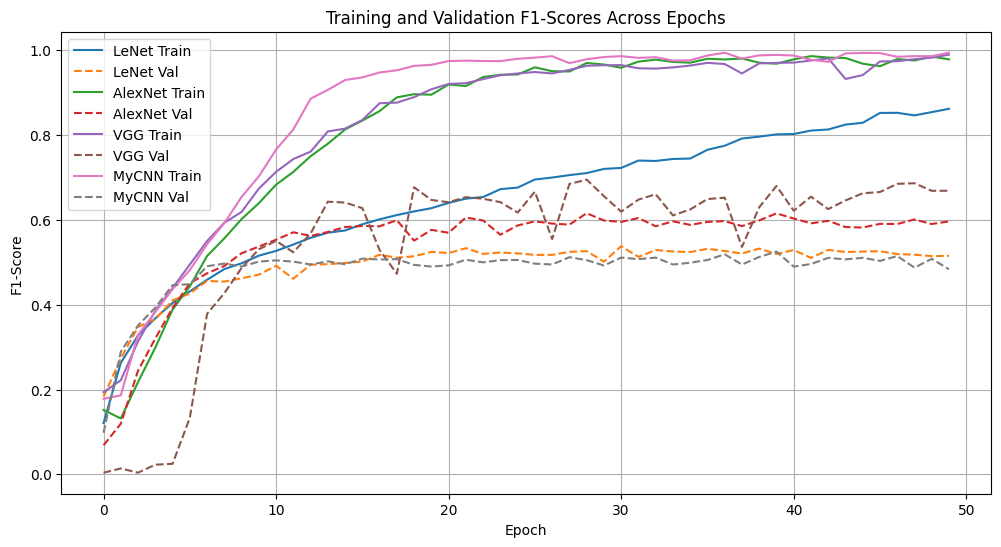

In [ ]:
import matplotlib.pyplot as plt

def plot_f1_scores(histories, model_names):
    plt.figure(figsize=(12, 6))

    for history, name in zip(histories, model_names):
        # Plot training F1-score
        plt.plot(history.history['f1_score'],
                 linestyle='-',
                 label=f'{name} Train')

        # Plot validation F1-score
        plt.plot(history.history['val_f1_score'],
                 linestyle='--',
                 label=f'{name} Val')

    plt.title('Training and Validation F1-Scores Across Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('F1-Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot all models' F1-scores
plot_f1_scores([lenet_history, alexnet_history, vgg_history, mycnn_history],
               ['LeNet', 'AlexNet', 'VGG', 'MyCNN'])

Αξιολόγηση Αποτελεσμάτων:


*   **Amount of Data/Classes**: Στη διάθεση μας έχουμε 10000 data points και 20 κλάσεις συνολικά. Άρα 500 data points για κάθε κλάση που είναι σχετικά moderate size dataset. Για αυτό ένα πολύ βαθύ μοντέλο όπως το VGG, δηλαδή με μεγαλύτερο capacity και learnable parameters καταφέρνει και πετυχαίνει τα καλύτερα αποτελέσματα, τον ακολουθεί ο AlexNet και έπειτα ο Lenet που είναι πολύ shallow και πιθανόν κάνει underfit. Τελικά, τα  μοντέλα πετυχαίνουν 0,5-0.66 f1-score που είναι ικανοποιητικό έχοντας υπόψη τον αριθμό epochs που χρησημοποιήσαμε.
Γενικά αν αυξήσουμε το πλήθος των δεδομένων, θα βελτιωθεί η απόδοση του μοντέλου, καθώς θα εκπαιδευτεί καλύτερα στο σύνολο των κλάσεων. Αυτή η βελτίωση τείνει να φτάνει σε κορεσμό, όπου η προσθήκη επιπλέον δεδομένων φέρνει μικρότερο όφελος, είτε λόγω των ορίων του μοντέλου είτε της φύσης των δεδομένων. Συγχρόνως, η αύξηση των δεδομένων θα αυξήσει τον απαιτούμενο χρόνο εκπαίδευσης και πιθανώς εκτέλεσης. Από την άλλη πλευρά, η αύξηση του αριθμού των κλάσεων καθιστά το πρόβλημα πιο σύνθετο, εισάγει μεγαλύτερη αβεβαιότητα και πιθανώς να μειώσει την απόδοση του μοντέλου.



*   **Optimizer**: Γενικά φαίνεται ότι όλα τα μοντέλα πετυχαίνουν καλύτερη γενίκευση με το SGD optimizer (με momentum) το οποίο είχε χρησημοποιηθεί και στα original papers τους. Βέβαια λόγου τους διαθέσιμους πόρους και για πρακτικούς λόγους χρησημοποιήθηκε ο Adam optimizer που εξίσου πετυχαίνει πολύ καλά αποτελέσματα (με περισσότερο Overfit) αλλα είναι πολύ πιο γρήγορο απο το SGD (πιο γρήγορη σύγκλιση).


*   **Batch Size**: Απλά μοντέλα όπως το AlexNet και Lenet είχαν τα καλύτερα αποτελέσματα για batch size = 128 ενω πιο περίπλοκα και βαθιά μοντέλα όπως το VGG και MyCNN πέτυχαν τα καλύτερα αποτελέσματα για μεγαλύτερα batch sizes(>128). Γενικα πάντως, λόγω των περιορισμένων πόρων (μνήμη) και ότι το dataset μας είναι σχετικά μικρό (10000 images) ένα μέτριο προς μικρό batch size όπως το 128 είναι το πιο κατάλληλο.


----------------------------

#### Βήμα 3: Αξιολόγηση F1-score με χρήση του test set.

---------------------------

In [ ]:
# Function to calculate and print the F1-score
def evaluate_model(model, model_name):
    # Evaluate the model on the test set
    _, f1, accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Print the F1-score
    print(f"{model_name} Test F1-score: {f1:.4f}")
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")

In [ ]:
# Evaluate each model and print its F1-score
evaluate_model(lenet, "LeNet")
evaluate_model(alexnet, "AlexNet")
evaluate_model(vgg, "VGG")
evaluate_model(mycnn, "MyCNN")

LeNet Test F1-score: 0.4870
LeNet Test Accuracy: 0.4905
AlexNet Test F1-score: 0.5886
AlexNet Test Accuracy: 0.5870
VGG Test F1-score: 0.6764
VGG Test Accuracy: 0.6790
MyCNN Test F1-score: 0.4607
MyCNN Test Accuracy: 0.4720


Όπως είχαμε εξηγήσει αναλυτικά στο προηγούμενο ερώτημα, βλέπουμε πως το VGG είχε τα καλύτερα αποτελέσματα όπως αναμέναμε εφόσον είναι και το βαθύτερο μοντέλο και αρα έχει μεγαλύτερο capacity στο να μάθει τα training data καλύτερα. Βέβαια όλα τα μοντέλα κάνουν overfit που είναι το πρόβλημα που θα λύσουμε στο ακριβώς επόμενο ερώτημα.


## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), ώστε το μοντέλο σας να γενικεύει καλύτερα, όπως:

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator))

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε τα αποτελέσματά σας, βάσει του F1 score για το σύνολο επικύρωσης και για το σύνολο ελέγχου

---


---

#### Βήμα 1: Έλεγχος Υπερεκπαίδευσης

---

Θα δημιουργήσουμε 4 διαφορετικά μοντέλα βασισμένα στο **MyCNN** αλλα με παραμετροποιημένες **dropout** ή **data augmentation**. Πιο αναλυτικά έχουμε:

Dropout μετα απο κάθε pooling και fc layer με διαφορετικό droprate και image augmentation (translation, contrast, flip) υλοποιημένο ως layer στο μοντέλο:

* model_v1: droprate 0.2


* model_v2: droprate 0.3


Dropout μόνο μετά απο fc και Image augmentation (random zoom,rotation, flip).

*   model_v3: droprate 0.4

* model_v4: droprate 0.5

In [ ]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomTranslation
from tensorflow.keras import Input

def create_mycnn_with_dropout_augmentation_1(droprate):

    data_augmentation = tf.keras.Sequential([
        RandomContrast(factor=0.2),
        RandomTranslation(height_factor=0.1, width_factor=0.1),
        RandomFlip("Horizontal")
    ])

    # Keras automatically disables data augmentation for inference
    model = models.Sequential([
        Input(shape=(32, 32, 3)),
        data_augmentation,  # Apply data augmentation
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        layers.Dropout(droprate),  # Dropout after Block 1

        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        layers.Dropout(droprate),  # Dropout after Block 2

        # Block 3
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        layers.Dropout(droprate),  # Dropout after Block 3 with higher rate

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(droprate),  # Dropout in the fully connected layer
        layers.Dense(20, activation='softmax')
    ])

    OPTIMIZER = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=OPTIMIZER,
                  loss=LOSS_FUNCTION,
                  metrics=[F1Score, 'accuracy'])
    return model


In [ ]:
mycnn_with_dropout_augmentationLayers_1 = create_mycnn_with_dropout_augmentation_1(0.2)
mycnn_with_dropout_augmentationLayers_2 = create_mycnn_with_dropout_augmentation_1(0.3)

In [ ]:
mycnn_with_dropout_augmentationLayers_history_1 = train_model(mycnn_with_dropout_augmentationLayers_1, "MyCNN with Dropout and Augmentation Layers v1")
mycnn_with_dropout_augmentationLayers_history_2 = train_model(mycnn_with_dropout_augmentationLayers_2, "MyCNN with Dropout and Augmentation Layers v2")

Training MyCNN with Dropout and Augmentation Layers v1...
Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.0605 - f1_score: 0.0291 - loss: 2.9773 - val_accuracy: 0.0960 - val_f1_score: 0.0284 - val_loss: 2.8095
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.1244 - f1_score: 0.0823 - loss: 2.7080 - val_accuracy: 0.2220 - val_f1_score: 0.1945 - val_loss: 2.4871
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2537 - f1_score: 0.2354 - loss: 2.3880 - val_accuracy: 0.3253 - val_f1_score: 0.3077 - val_loss: 2.2002
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.3187 - f1_score: 0.3075 - loss: 2.1830 - val_accuracy: 0.3647 - val_f1_score: 0.3283 - val_loss: 2.0468
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3490 - f1_score: 0.3338 - loss: 2.0806 - val_accuracy: 0.3893 - val_f1_score: 0.3916 - val_loss: 1.9523
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3934 - f1_score: 0.3871 - loss: 

In [ ]:
def create_mycnn_with_dropout_augmentation_2(droprate):

    data_augmentation = tf.keras.Sequential([
        RandomFlip("horizontal"),
        RandomRotation(0.2),
        RandomZoom(0.2),
    ])


    model = models.Sequential([
        Input(shape=(32, 32, 3)),
        data_augmentation,  # Apply data augmentation
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        # Block 3
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(droprate),
        layers.Dense(20, activation='softmax')
    ])

    OPTIMIZER = optimizers.Adam(learning_rate=0.001)  # recreate
    model.compile(optimizer=OPTIMIZER,
                  loss=LOSS_FUNCTION,
                  metrics=[F1Score, 'accuracy'])
    return model

In [ ]:
mycnn_with_dropout_augmentationLayers_3 = create_mycnn_with_dropout_augmentation_2(0.4)
mycnn_with_dropout_augmentationLayers_4 = create_mycnn_with_dropout_augmentation_2(0.5)

In [ ]:
mycnn_with_dropout_augmentationLayers_history_3 = train_model(mycnn_with_dropout_augmentationLayers_3, "MyCNN with Dropout and Augmentation Layers v3")
mycnn_with_dropout_augmentationLayers_history_4 = train_model(mycnn_with_dropout_augmentationLayers_4, "MyCNN with Dropout and Augmentation Layers v4")

Training MyCNN with Dropout and Augmentation Layers v3...
Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.0640 - f1_score: 0.2627 - loss: 2.9560 - val_accuracy: 0.1587 - val_f1_score: 0.1037 - val_loss: 2.6580
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.1516 - f1_score: 0.1245 - loss: 2.6643 - val_accuracy: 0.2107 - val_f1_score: 0.1644 - val_loss: 2.4707
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2136 - f1_score: 0.1960 - loss: 2.4871 - val_accuracy: 0.2720 - val_f1_score: 0.2235 - val_loss: 2.3612
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2675 - f1_score: 0.2477 - loss: 2.3303 - val_accuracy: 0.3387 - val_f1_score: 0.3169 - val_loss: 2.1264
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3086 - f1_score: 0.2943 - loss: 2.2104 - val_accuracy: 0.3520 - val_f1_score: 0.3388 - val_loss: 2.1587
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3317 - f1_score: 0.3180 - loss: 

----
#### Bήμα 2: Αξιολόγηση
----

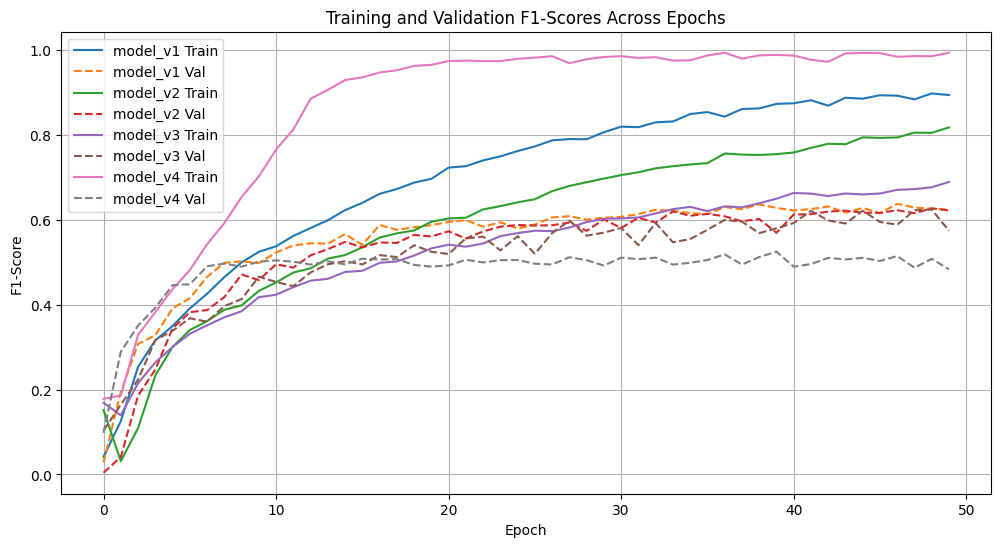

In [ ]:
plot_f1_scores([mycnn_with_dropout_augmentationLayers_history_1, mycnn_with_dropout_augmentationLayers_history_2,
                mycnn_with_dropout_augmentationLayers_history_3, mycnn_history, mycnn_with_dropout_augmentationLayers_4],
               ['model_v1', 'model_v2', 'model_v3', 'model_v4'])

In [ ]:
evaluate_model(mycnn_with_dropout_augmentationLayers_1, "MyCNN with Dropout and Augmentation Layers v1")
evaluate_model(mycnn_with_dropout_augmentationLayers_2, "MyCNN with Dropout and Augmentation Layers v2")
evaluate_model(mycnn_with_dropout_augmentationLayers_3, "MyCNN with Dropout and Augmentation Layers v3")
evaluate_model(mycnn_with_dropout_augmentationLayers_4, "MyCNN with Dropout and Augmentation Layers v4")

MyCNN with Dropout and Augmentation Layers v1 Test F1-score: 0.6236
MyCNN with Dropout and Augmentation Layers v1 Test Accuracy: 0.6255
MyCNN with Dropout and Augmentation Layers v2 Test F1-score: 0.6150
MyCNN with Dropout and Augmentation Layers v2 Test Accuracy: 0.6170
MyCNN with Dropout and Augmentation Layers v3 Test F1-score: 0.5847
MyCNN with Dropout and Augmentation Layers v3 Test Accuracy: 0.5900
MyCNN with Dropout and Augmentation Layers v4 Test F1-score: 0.6073
MyCNN with Dropout and Augmentation Layers v4 Test Accuracy: 0.6090


Προηγουμένως χρησημοποιήσαμε dropout με data augmentation προκειμένου να βελτιώσουμε τη γενικευτική ικανότητα του μοντέλου και να μειώσουμε τον κίνδυνο overfitting.Το data augmentation υλοποιήθηκε ως layer στο ίδιο το μοντέλο με keras.layers.

Τώρα ως προς τα αποτελέσματα που πετύχαμε ισχυεί το εξης:

Σε όλους δύο συνδυασμούς που δοκιμάσαμε το f1-score αυξήθηκε αξιοσήμαντα στο test set σε σχέση με πριν που σημαίνει ότι πετύχαμε το στόχο μας.
Δηλαδή το model δε κάνει overfit σε μεγάλο βαθμό και είναι πιο robust και generalizable.

## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς το F1 score στην αντιμετώπιση της υπερεκπαίδεσης.

Για το transfer learning, επιλέξτε το [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19)  και το [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0) για μεταφορά μάθησης.

α. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

β. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

---
### Βήμα 2: Αξιολόγηση

Αξιολογήστε τα αποτελέσματά σας, βάσει του F1 score για το σύνολο επικύρωσης και για το σύνολο ελέγχου.

---

----
#### Βήμα 1: Μεταφορά γνώσης
----

Για να πετύχουμε ικανοποιητικά αποτελέσματα με transfer learning αρκούν 10 εποχές (επίσης έχουμε περιορισμένουν πόρους).

In [ ]:
#suitable for transfer learning
def train_model(model, name):
    print(f"Training {name}...")
    history = model.fit(x_train, y_train,
                        batch_size=128,
                        epochs=10,
                        validation_data=(x_val, y_val),
                        verbose=1)
    return history

Freezing the base model (VGG19-EfficientNetB0) and training only the classification head of MyCNN.

>Αξίζει να σημειωθεί ότι σε περίπτωση περισσότερων πορών θα πετυχαίναμε ακόμη καλύτερα αποτελέσματα στα ακόλουθα άμα κάναμε resize την εικόνα μας σε 224x224 που είναι το input που περιμένουν τα original vgg19 και efficientnetb0. Ή ακόμη μια μέση λύση θα ήταν να τα κάναμε resize σε 96x96 ώστε να μη χαθεί πολύ ποιότητα της αρχικής εικόνας και να είναι και πιο κατάλληλη για τις αρχιτεκτονικες VGG, Effnet. Βέβαια λόγου της χαμηλής απόδοσης ως προς το χρόνο των προηγουμένων δε κάνουμε καθόλου resize που εξίσου οδηγεί σε καλά αποτελέσματα και δείχνει τη χρησημότητα του transfer learning.

In [ ]:
from tensorflow.keras.applications import VGG19, EfficientNetB0
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization

def create_vgg19_transfer_model():
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False

    inputs = Input(shape=(32, 32, 3))
    x = base_model(inputs, training=False)

    # MyCNN classification head
    x = layers.Flatten()(x)
    x = Dense(512, activation='relu')(x)
    outputs = Dense(20, activation='softmax')(x)

    model = Model(inputs, outputs)

    model.compile(optimizer='Adam',
                  loss=LOSS_FUNCTION,
                  metrics=[F1Score, 'accuracy'])
    return model

vgg19_model = create_vgg19_transfer_model()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vgg19_model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,297,300 (77.43 MB)

 Trainable params: 272,916 (1.04 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
vgg19_history = train_model(vgg19_model, "VGG19 Transfer Learning")

Training VGG19 Transfer Learning...
Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.3053 - f1_score: 0.4307 - loss: 2.3505 - val_accuracy: 0.5013 - val_f1_score: 0.4867 - val_loss: 1.6799
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5185 - f1_score: 0.5103 - loss: 1.5335 - val_accuracy: 0.5093 - val_f1_score: 0.5032 - val_loss: 1.5976
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5594 - f1_score: 0.5546 - loss: 1.4073 - val_accuracy: 0.5253 - val_f1_score: 0.5268 - val_loss: 1.5357
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5837 - f1_score: 0.5786 - loss: 1.3182 - val_accuracy: 0.5413 - val_f1_score: 0.5374 - val_loss: 1.4929
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6134 - f1_score: 0.6097 - loss: 1.2363 - val_accuracy: 0.5300 - val_f1_score: 0.5273 - val_loss: 1.4821
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6337 - f1_score: 0.6301 - loss: 1.1669 - val_accurac

In [ ]:
def create_efficientnetb0_transfer_model():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False

    inputs = Input(shape=(32, 32, 3))
    x = base_model(inputs, training=False)

    # MyCNN classification head
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    outputs = layers.Dense(20, activation='softmax')(x)

    model = Model(inputs, outputs)

    model.compile(optimizer="Adam",
                  loss=LOSS_FUNCTION,
                  metrics=[F1Score, 'accuracy'])
    return model

efficientnet_model = create_efficientnetb0_transfer_model()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
efficientnet_model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 1, 1, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,715,703 (17.99 MB)

 Trainable params: 666,132 (2.54 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
efficientnet_history = train_model(efficientnet_model, "EfficientNetB0 Transfer Learning")

Training EfficientNetB0 Transfer Learning...
Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 42s 312ms/step - accuracy: 0.0451 - f1_score: 0.2589 - loss: 3.0576 - val_accuracy: 0.0560 - val_f1_score: 0.0059 - val_loss: 3.0014
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.0530 - f1_score: 0.0222 - loss: 3.0028 - val_accuracy: 0.0427 - val_f1_score: 0.0035 - val_loss: 2.9962
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0511 - f1_score: 0.0211 - loss: 2.9962 - val_accuracy: 0.0467 - val_f1_score: 0.0042 - val_loss: 2.9969
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0468 - f1_score: 0.0135 - loss: 2.9960 - val_accuracy: 0.0447 - val_f1_score: 0.0038 - val_loss: 2.9966
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0512 - f1_score: 0.0050 - loss: 2.9955 - val_accuracy: 0.0447 - val_f1_score: 0.0038 - val_loss: 2.9970
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0545 - f1_score: 0.0060 - loss: 2.9955 - v

**Fine Tuning**

> Θα ξεπαγώσουμε μερικά απο τα τελευταία layers των μοντέλων VGG-19, EfficientNetb0


In [ ]:
# fine tune vgg model
def create_vgg19_transfer_model_finetuned():
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False

    # Fine-tuning: Unfreeze some layers for training
    for layer in base_model.layers[-5:]:  # Unfreeze the last 5 layers (includes 4 convolutional layers and a pooling layer)
        layer.trainable = True

    inputs = Input(shape=(32, 32, 3))
    x = base_model(inputs, training=False) #we can try True here too

    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    outputs = layers.Dense(20, activation='softmax')(x)

    model = Model(inputs, outputs)

    model.compile(optimizer='Adam',
                  loss=LOSS_FUNCTION,
                  metrics=[F1Score, 'accuracy'])
    return model

vgg19_model_finetuned = create_vgg19_transfer_model_finetuned()

In [ ]:
vgg19_model_finetuned.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,297,300 (77.43 MB)

 Trainable params: 9,712,148 (37.05 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

In [ ]:
# Train the model
vgg19_history_finetuned = train_model(vgg19_model_finetuned, "VGG19 Transfer Learning with Fine-tuning")

Training VGG19 Transfer Learning with Fine-tuning...
Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.1908 - f1_score: 0.1487 - loss: 2.6280 - val_accuracy: 0.4573 - val_f1_score: 0.4464 - val_loss: 1.7182
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5269 - f1_score: 0.5207 - loss: 1.4892 - val_accuracy: 0.5827 - val_f1_score: 0.5739 - val_loss: 1.4002
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6456 - f1_score: 0.6431 - loss: 1.1260 - val_accuracy: 0.6020 - val_f1_score: 0.6116 - val_loss: 1.3242
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.7039 - f1_score: 0.7032 - loss: 0.9321 - val_accuracy: 0.6213 - val_f1_score: 0.6237 - val_loss: 1.2681
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7414 - f1_score: 0.7404 - loss: 0.7858 - val_accuracy: 0.6013 - val_f1_score: 0.5930 - val_loss: 1.3948
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7716 - f1_score: 0.7710 - loss: 0.69

In [ ]:
# fine tune efficientnetb0 model
def create_efficientnetb0_transfer_model_finetuned():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False
    # Fine-tuning: Unfreeze some layers for training
    for layer in base_model.layers[-32:]:  # Unfreeze the last 5 layers (includes 4 convolutional layers and a pooling layer)
        layer.trainable = True

    inputs = Input(shape=(32, 32, 3))
    x = base_model(inputs, training=True) #we can try True here too

    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    outputs = layers.Dense(20, activation='softmax')(x)

    model = Model(inputs, outputs)

    model.compile(optimizer='Adam',
                  loss=LOSS_FUNCTION,
                  metrics=[F1Score, 'accuracy'])
    return model

efficientnetb0_model_finetuned = create_efficientnetb0_transfer_model_finetuned()

In [ ]:
efficientnetb0_model_finetuned.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 1, 1, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,715,703 (17.99 MB)

 Trainable params: 2,383,476 (9.09 MB)

 Non-trainable params: 2,332,227 (8.90 MB)

In [ ]:
efficientnet_history_finetuned = train_model(efficientnetb0_model_finetuned, "EfficientNetB0 Transfer Learning with Fine-tuning")

Training EfficientNetB0 Transfer Learning with Fine-tuning...
Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 48s 339ms/step - accuracy: 0.0582 - f1_score: 0.2958 - loss: 3.1433 - val_accuracy: 0.0427 - val_f1_score: 0.0035 - val_loss: 3.0226
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0654 - f1_score: 0.0574 - loss: 2.9959 - val_accuracy: 0.0560 - val_f1_score: 0.0060 - val_loss: 3.1260
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0755 - f1_score: 0.0658 - loss: 2.9455 - val_accuracy: 0.0560 - val_f1_score: 0.0059 - val_loss: 3.4359
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0879 - f1_score: 0.0765 - loss: 2.8993 - val_accuracy: 0.0527 - val_f1_score: 0.0064 - val_loss: 3.8332
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0979 - f1_score: 0.0869 - loss: 2.8632 - val_accuracy: 0.0533 - val_f1_score: 0.0063 - val_loss: 4.1480
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1210 - f1_score: 0.1080 - 

#### Βήμα 2: Αξιολόγηση

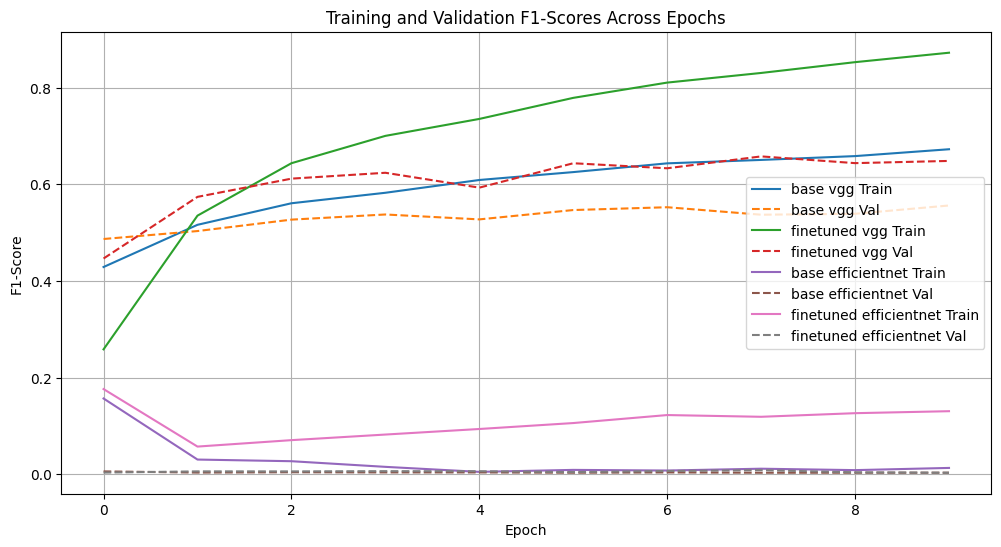

In [ ]:
plot_f1_scores([vgg19_history, vgg19_history_finetuned, efficientnet_history, efficientnet_history_finetuned],
               ['base vgg', 'finetuned vgg', 'base efficientnet', 'finetuned efficientnet'])

In [ ]:
evaluate_model(vgg19_model, "VGG19 Transfer Learning")
evaluate_model(vgg19_model_finetuned, "VGG19 Transfer Learning with Fine-tuning")
evaluate_model(efficientnet_model, "EfficientNetB0 Transfer Learning")
evaluate_model(efficientnetb0_model_finetuned, "EfficientNetB0 Transfer Learning with Fine-tuning")

VGG19 Transfer Learning Test F1-score: 0.5873
VGG19 Transfer Learning Test Accuracy: 0.5890
VGG19 Transfer Learning with Fine-tuning Test F1-score: 0.6721
VGG19 Transfer Learning with Fine-tuning Test Accuracy: 0.6725
EfficientNetB0 Transfer Learning Test F1-score: 0.0048
EfficientNetB0 Transfer Learning Test Accuracy: 0.0500
EfficientNetB0 Transfer Learning with Fine-tuning Test F1-score: 0.0048
EfficientNetB0 Transfer Learning with Fine-tuning Test Accuracy: 0.0500


Απο τα προηγούμενα αποτελέσματα φαίνεται η χρησημότητα του Transfer Learning, η χρήση δηλαδή είδη προεκπαιδευμένων μοντέλων (πάγωμα μεγάλο μέρος βαρών) και η περαιτέρω εκπαιδευσή τους στα δεδομένα μας. Αυτό έχει ως αποτέλεσμα αποδοτική και γρήγορη εκπαίδευση που οδηγεί σε αρκετά καλά αποτελέσματα.

Πιο συγκεκριμένα εδω στη περίπτωση μας (CNN based architectures) στο πρώτο μέρος κρατάμε τη συνελεκτική βάση των μοντέλων που είναι υπεύθυνη για feature extraction και προσθέτουμε δικό μας classification head. Έτσι η εξαγωγή χαρακτηριστικών ουσιαστικά γίνεται σε Inference mode και εμείς προπονούμε το classification head συγκεκριμένα για τα δεδομένα μας και αυτό προφανώς οδηγεί σε καλά αποτελέσματα πολύ γρήγορα λόγου ότι τα μοντέλα που φορτώνουμε είναι είδη πολύ καλα στην εξαγωγη χαρακτηριστικών εικόνων.

Στο δεύτερο βήμα όπου ξεπαγώνουμε κάποια απο τα τελευταία Layers της συνελεκτικής βάσης (more fine tuning) οδηγεί σε μεγαλύτερο χρόνο εκπαίδευσης αλλα καλύτερα αποτελέσματα απο πριν εφοσον και ένα μέρος της εξαγωγής χαρακτηριστικών θα είναι προσαρμοσμένο στα δεδομένα μας.

Αξίζει να σημειωθεί ότι λόγο του μικρού μεγέθους των εικόνων στο CIFAR-100, το μοντέλο EfficientNetB0 σε αντίθεση με το VGG19, δε πέτυχε καλά αποτελέσματα και αυτό οφείλεται στο ότι η αρχιτεκτονική EfficientNetB0 σχεδιάστηκε και βελτιστοποιήθηκε (μέσω Neural Architecture Search - NAS) πρωτίστως για datasets με εικόνες υψηλότερης ανάλυσης, όπως το ImageNet (π.χ., 224x224). Η συγκεκριμένη ισορροπία μεταξύ βάθους, πλάτους δικτύου και ανάλυσης εισόδου, καθώς και η δομή των μπλοκ του (MBConv), μπορεί να μην είναι η ιδανική για την εξαγωγή χαρακτηριστικών από εικόνες μόλις 32x32 pixels. Η γρήγορη μείωση της χωρικής ανάλυσης σε συνδυασμό με το βάθος και την πολυπλοκότητα του δικτύου ενδέχεται να καθιστά δύσκολη την εκμάθηση λεπτομερών χαρακτηριστικών που είναι κρίσιμα για τη διάκριση των 100 κλάσεων του CIFAR-100. Αντίθετα, η πιο απλή και ομοιόμορφη δομή του VGG19, παρόλο που είναι λιγότερο αποδοτική υπολογιστικά, μπορεί να προσαρμόζεται καλύτερα στη χαμηλή ανάλυση του CIFAR-100, επιτρέποντας μια πιο σταδιακή εξαγωγή χαρακτηριστικών που τελικά οδηγεί σε καλύτερη απόδοση στο dataset μας.

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data).

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
